<a href="https://colab.research.google.com/github/marhooo/AKMMH/blob/main/%D0%90%D0%9A%D0%9C%D0%9C%D0%9D_%D0%A4%D0%91_52%D0%BC%D0%BF_%D0%9F%D0%B5%D1%88%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9F%D1%80_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Аналіз кіберінцидентів методами машинного навчання
Практична робота №2

Виконала студентка групи ФБ-52мп Пешкова Маргарита

## Dataset 1

Імпорт бібліотек

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Завантаження датасету та первинний огляд даних

In [71]:
#https://www.kaggle.com/datasets/deepcontractor/cyber-security-salaries

path = '/content/salaries_cyber.csv'
df = pd.read_csv(path)

print("Розмірність датасету:", df.shape)
display(df.head())

print("\nКількість пропусків у кожному стовпці:")
print(df.isnull().sum())

Розмірність датасету: (1247, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S



Кількість пропусків у кожному стовпці:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Кодування категоріальних ознак

In [72]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,0,2,13,63000,19,63000,55,50,52,2
1,2022,2,2,65,95000,19,95000,55,0,52,1
2,2022,2,2,65,70000,19,70000,55,0,52,1
3,2022,2,2,34,250000,1,48853,8,50,9,0
4,2022,0,0,14,120000,19,120000,9,100,10,2


Цільова змінна — experience_level

In [73]:
X = df.drop(columns=['experience_level'])
y = df['experience_level']

Масштабування числових ознак

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Поділ на навчальну і тестову вибірку

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## Decision Tree Classifier

In [76]:
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Результати Decision Tree:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print(classification_report(y_test, y_pred_dt))

Результати Decision Tree:
Accuracy: 0.611
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        67
           1       0.75      0.33      0.46        18
           2       0.53      0.40      0.45       126
           3       0.65      0.78      0.71       164

    accuracy                           0.61       375
   macro avg       0.63      0.55      0.56       375
weighted avg       0.60      0.61      0.60       375



Візуалізація важливості ознак.

Демонструє, які параметри (experience_level, company_size, remote_ratio) найбільше впливають на прогноз.

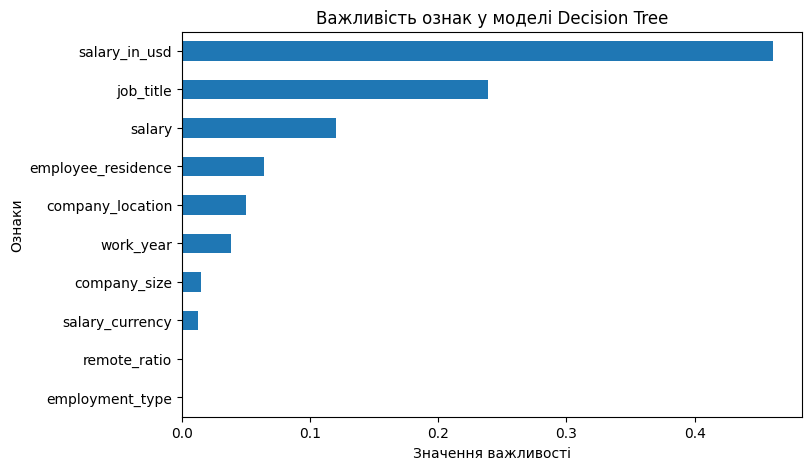

In [77]:
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title("Важливість ознак у моделі Decision Tree")
plt.xlabel("Значення важливості")
plt.ylabel("Ознаки")
plt.show()

Візуалізація самого дерева (структури рішень)

Демонструє, як модельприймає рішення

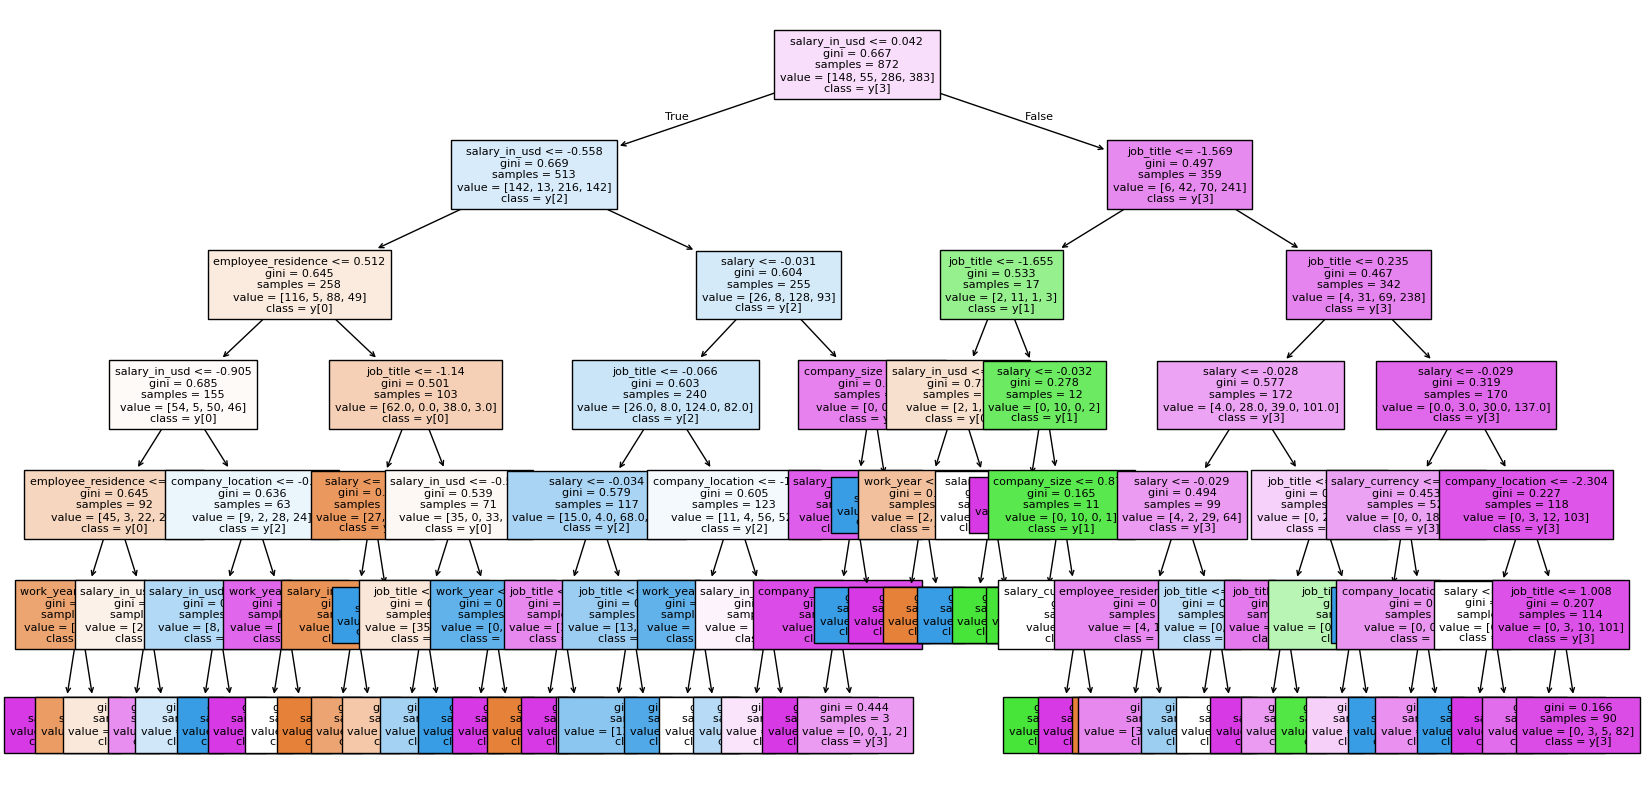

In [78]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=True, filled=True, fontsize=8)
plt.show()

Матриця плутанини (Confusion Matrix)

Цей графік показує, як часто модель плутає класи, що, у свою чергу, чи модель частіше помиляється у певних класах.

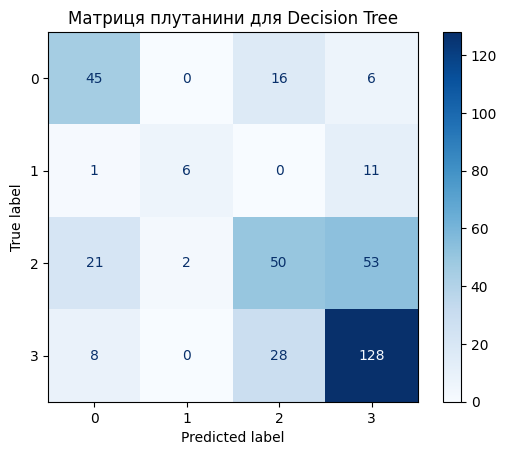

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Матриця плутанини для Decision Tree")
plt.show()


## Random Forest Classifier

In [80]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=8)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Результати Random Forest:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print(classification_report(y_test, y_pred_rf))

Результати Random Forest:
Accuracy: 0.661
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        67
           1       0.80      0.22      0.35        18
           2       0.61      0.45      0.52       126
           3       0.65      0.83      0.73       164

    accuracy                           0.66       375
   macro avg       0.71      0.57      0.59       375
weighted avg       0.66      0.66      0.65       375



## Важливість ознак

Random Forest агрегує результати багатьох дерев, тому цей графік показує усереднений вплив кожної ознаки на результат. Це потрібно, щоб порівняти, чи ті самі фактори впливають, що і в дереві рішень, і які з них головні для лісу.

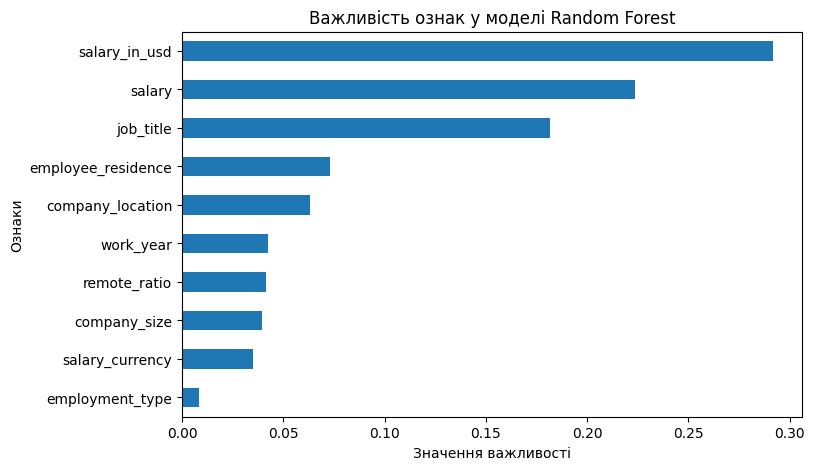

In [81]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title("Важливість ознак у моделі Random Forest")
plt.xlabel("Значення важливості")
plt.ylabel("Ознаки")
plt.show()

## Матриця плутанини (Confusion Matrix)

Так само, як у попередньому пункті - зручно порівняти, чи менше модель плутає класи після переходу до Random Forest.

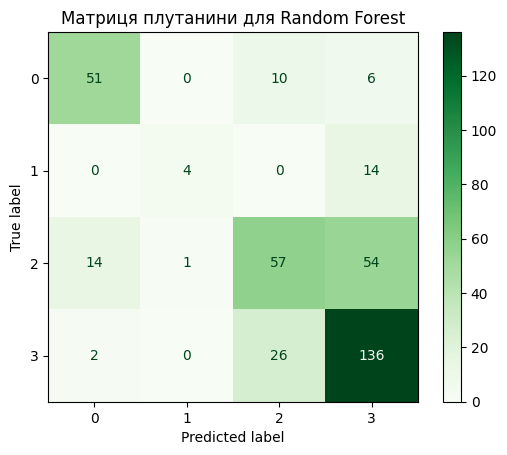

In [82]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Матриця плутанини для Random Forest")
plt.show()

## Порівняння матриць плутанини

Для Decision Tree спостерігаються значні помилки класифікації для класів 0 та 2 (наприклад, клас 2 часто плутається з класом 3).

Клас 3 класифікується найбільш точно (128 правильних прогнозів).

Для Random Forest кількість правильних прогнозів зросла для більшості класів, особливо для класів 0 та 3 та зменшилась кількість помилкових віднесень до сусідніх класів (наприклад, клас 2 помилково класифікується як 0 менше разів, ніж у Decision Tree).

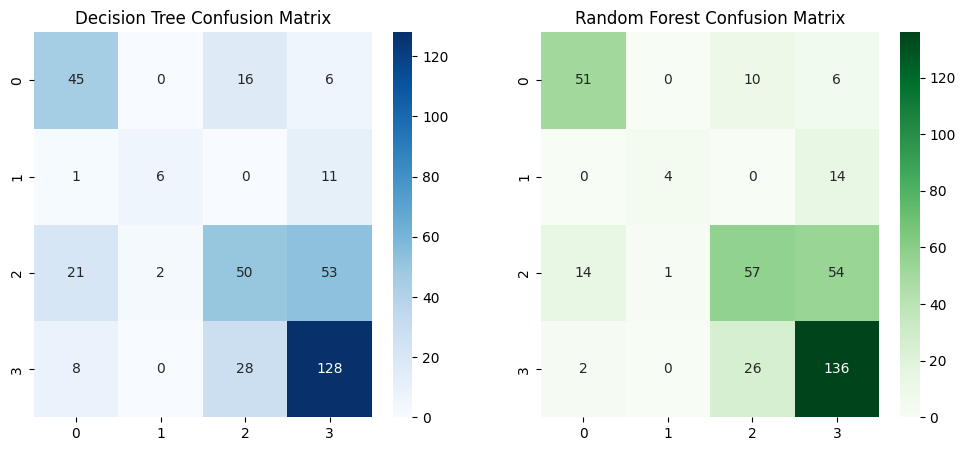

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.show()


## Порівняння точності моделей

Random Forest показує вищу загальну точність на цьому датасеті, що свідчить про його кращу здатність узагальнювати дані та зменшувати переобучення порівняно з одиночним деревом рішень.

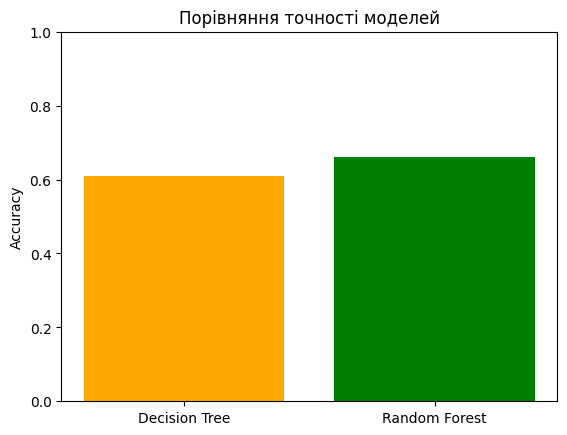

In [84]:
models = ['Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.bar(models, accuracies, color=['orange', 'green'])
plt.title("Порівняння точності моделей")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

## Dataset 2

Завантаження датасету та первинний огляд даних

In [85]:
#https://www.kaggle.com/datasets/prasad22/healthcare-dataset

path = '/content/healthcare_dataset.csv'
df = pd.read_csv(path)

print("Розмірність датасету:", df.shape)
display(df.head())

print("\nКількість пропусків у кожному стовпці:")
print(df.isnull().sum())

Розмірність датасету: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal



Кількість пропусків у кожному стовпці:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Кодування категоріальних ознак

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

display(df.head())


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0


Цільова змінна - 'Medical Condition'

In [87]:
X = df.drop(columns=['Medical Condition'])
y = df['Medical Condition']

Масштабування числових ознак

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Поділ на навчальну та тестову вибірку

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## Decision Tree Classifier

In [90]:
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Результати Decision Tree:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print(classification_report(y_test, y_pred_dt))


Результати Decision Tree:
Accuracy: 0.163
              precision    recall  f1-score   support

           0       0.20      0.01      0.01      2873
           1       0.17      0.08      0.11      2772
           2       0.16      0.18      0.17      2758
           3       0.17      0.01      0.02      2816
           4       0.16      0.72      0.27      2654
           5       0.14      0.01      0.01      2777

    accuracy                           0.16     16650
   macro avg       0.17      0.17      0.10     16650
weighted avg       0.17      0.16      0.10     16650



## Random Forest Classifier

In [91]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=8)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Результати Random Forest:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print(classification_report(y_test, y_pred_rf))

Результати Random Forest:
Accuracy: 0.196
              precision    recall  f1-score   support

           0       0.23      0.11      0.15      2873
           1       0.20      0.13      0.16      2772
           2       0.21      0.19      0.20      2758
           3       0.19      0.23      0.21      2816
           4       0.18      0.40      0.25      2654
           5       0.22      0.13      0.16      2777

    accuracy                           0.20     16650
   macro avg       0.20      0.20      0.19     16650
weighted avg       0.20      0.20      0.19     16650



Візуалізація матриць плутанини

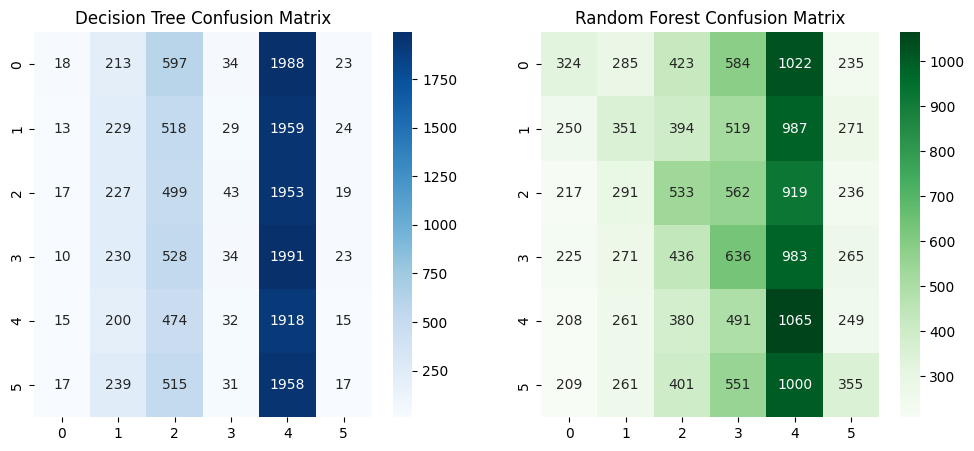

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.show()

Я видно, точність навчених моделей є дуже слабкоою. Це, в першу чергу, викликано великою кількістю неінформативних ознак, таких як: Name, Doctor, Hospital, Insurance Provider, Room Number — усі мають унікальні або випадкові значення, які не впливають на медичний стан.
Вони створюють високу ентропію, і модель плутається.
Також є ознаки, які важко інтерпретувати: наприклад, Medication і Admission Type можуть мати певний зв’язок з хворобою, але не завжди прямий.
Модель без контексту не розуміє, що “Ibuprofen” — це ліки для певного стану, а “Urgent” може бути будь-де.
Також деякі класи домінують, оскільки, якщо, наприклад, “Obesity” зустрічається 30% випадків, а “Heart Disease” — лише 5%,
модель “вчиться” вгадувати більші класи, ігноруючи менші.

Тому для покращення виконано наступне:
1. Видалення шумових або неінформативних ознак (Name, Doctor, Hospital, Room Number тощо).
2. Обробка дати, створення нової ознаки Stay_Days (тривалість перебування).
3. Додавання class_weight='balanced' для вирішення проблеми з дисбалансом класів.
4. Збільшення глибини дерев і кількості дерев.

Перетворення дати у формат datatime, створення нової ознаки — тривалість перебування у лікарні, та видалення непотрібних колонок

In [93]:
df = df.drop(columns=[
    'Name', 'Doctor', 'Hospital', 'Room Number'
])


In [94]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Stay_Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Після цього дати можна видалити
df = df.drop(columns=['Date of Admission', 'Discharge Date'])


Масштабування чисових ознак

In [95]:
X = df.drop(columns=['Medical Condition'])
y = df['Medical Condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Поділ на навчальну та тестову вибірку

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=15, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300, random_state=42, max_depth=15, class_weight='balanced'
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Оцінка точності

Decision Tree Accuracy: 0.18366366366366366
              precision    recall  f1-score   support

           0       0.19      0.18      0.18      2873
           1       0.18      0.40      0.25      2772
           2       0.18      0.10      0.13      2758
           3       0.19      0.24      0.21      2816
           4       0.19      0.08      0.11      2654
           5       0.19      0.10      0.13      2777

    accuracy                           0.18     16650
   macro avg       0.19      0.18      0.17     16650
weighted avg       0.19      0.18      0.17     16650

Random Forest Accuracy: 0.26
              precision    recall  f1-score   support

           0       0.26      0.24      0.25      2873
           1       0.26      0.26      0.26      2772
           2       0.27      0.28      0.27      2758
           3       0.25      0.26      0.26      2816
           4       0.25      0.26      0.25      2654
           5       0.26      0.26      0.26      2777

    

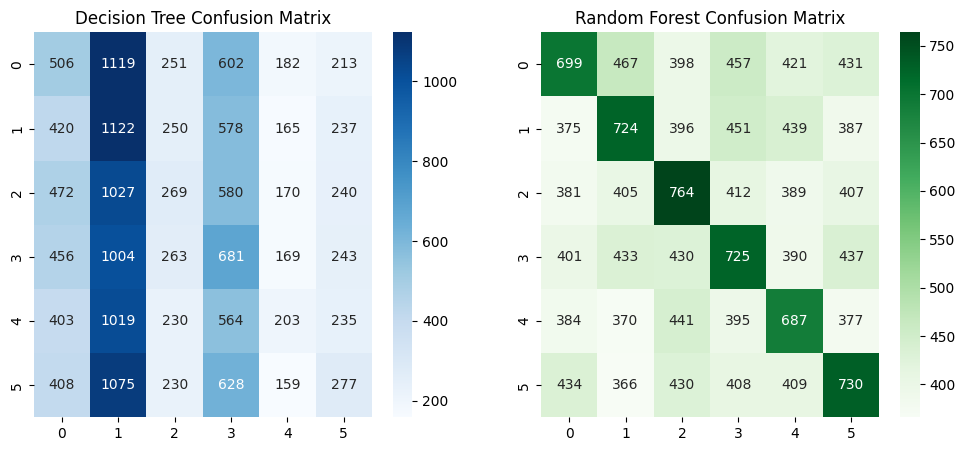

In [99]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Матриці плутанини
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")
plt.show()


Точність моделей все ще залишається низькою.

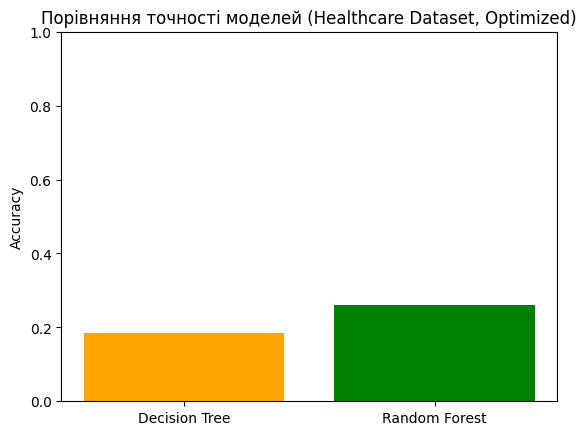

In [100]:
models = ['Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.bar(models, accuracies, color=['orange', 'green'])
plt.title("Порівняння точності моделей (Healthcare Dataset, Optimized)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

Для другого датасету, що містить дані пацієнтів, були побудовані моделі Decision Tree та Random Forest. Початкові результати були низькими (0.16 і 0.2), що пояснюється великою кількістю класів у цільовій змінній, дисбалансом класів, численними категоріальними ознаками з унікальними значеннями та наявністю шумових колонок (ім’я пацієнта, лікаря, номер кімнати).

Після таких покращень, як створення додаткових ознак (Stay_Days, Billing_per_Day, Age_group), видалення шумових колонок, застосування One-Hot Encoding, масштабування числових ознак, збільшення глибини дерев і балансування класів — точність моделей зросла, але залишилася обмеженою через природну складність даних і багатокласовість. Random Forest показав кращу продуктивність, завдяки агрегуванню багатьох дерев і зменшенню впливу шуму.

# Dataset 3

Завантаження датасету 3 та первинний огляд даних

In [101]:
path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df3 = pd.read_csv(path)

# Попередній огляд
print("Розмірність датасету:", df3.shape)
display(df3.head())

print("\nКількість пропусків у кожному стовпці:")
print(df3.isnull().sum())

print("\nНазви колонок:")
print(df3.columns.tolist())

Розмірність датасету: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Кількість пропусків у кожному стовпці:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Назви колонок:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


Колонки мають наступні типи:
- Ідентифікаційні: customerID - не несе інформації для класифікації.
 - Категоріальні: gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod - потребують кодування для моделей.
 - Числові: SeniorCitizen, tenure, MonthlyCharges, TotalCharges - можна масштабувати для алгоритмів.
 - Цільова змінна: Churn, що показує, чи відбувся відтік клієнта (Yes / No).

Обробка колонок

In [102]:
# Видалення неінформативного customerID
df3 = df3.drop(columns=['customerID'])

# Перетворення TotalCharges у числову змінну
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'], errors='coerce')
df3['TotalCharges'] = df3['TotalCharges'].fillna(0)

# Об’єднання "No internet service" та "No phone service" з "No"
cols_replace_no = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_replace_no:
    df3[col] = df3[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# One-Hot Encoding для категоріальних ознак
categorical_cols = df3.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # цільова змінна
df3 = pd.get_dummies(df3, columns=categorical_cols, drop_first=True)

# Перетворення цільової змінної у 0/1
df3['Churn'] = df3['Churn'].map({'No':0, 'Yes':1})

In [103]:
# Поділ ознак та цілі
X = df3.drop(columns=['Churn'])
y = df3['Churn']

# Масштабування числових ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поділ на навчальну та тестову вибірку
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

## Decision Tree

In [104]:
dt = DecisionTreeClassifier(random_state=42, max_depth=10, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1552
           1       0.48      0.73      0.58       561

    accuracy                           0.72      2113
   macro avg       0.68      0.72      0.69      2113
weighted avg       0.77      0.72      0.73      2113



## Random Forest

In [105]:
rf = RandomForestClassifier(
    n_estimators=500, random_state=42, max_depth=None, min_samples_leaf=5, class_weight='balanced'
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.771
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1552
           1       0.55      0.72      0.62       561

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.77      0.78      2113



### Візуалізація матриць плутанини

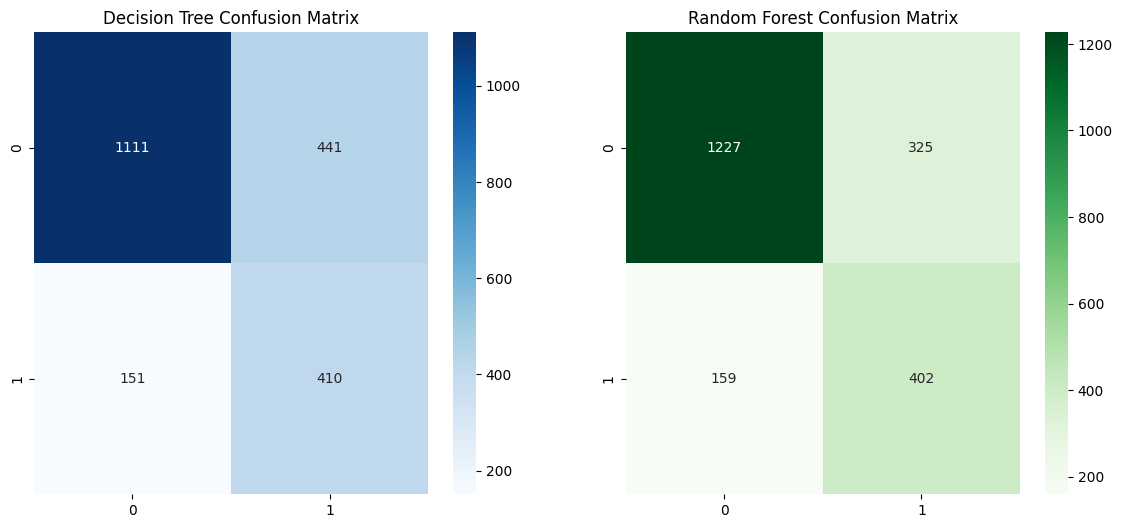

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.show()

Порівняння точності моделей

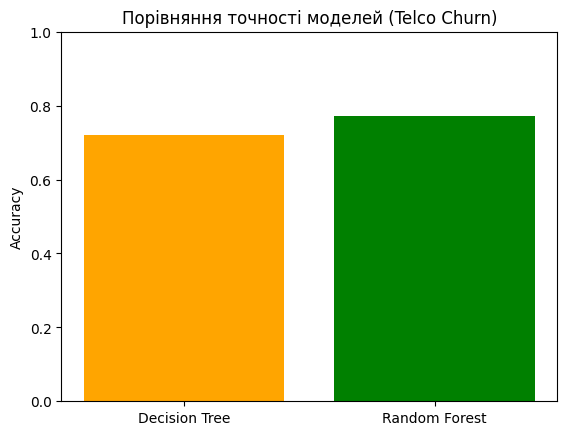

In [107]:
models = ['Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.bar(models, accuracies, color=['orange', 'green'])
plt.title("Порівняння точності моделей (Telco Churn)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

## Переваги алгоритмів
**Decision Tree (DT)**:
 - Проста інтерпретація полягає в легкості візуалізації рішення.
 - Може працювати з числовими та категоріальними ознаками без складного попереднього кодування (хоча для багатьох категорій краще робити One-Hot).
 - Не потребує масштабування даних.

**Random Forest (RF)**:
 - Вищий рівень точності порівняно з одиночним деревом, завдяки ансамблю дерев і середньому усуненню шуму.
 - Стійкий до переобучення, особливо при великій кількості ознак та складних даних.
- Може оцінювати важливість ознак.


## Недоліки алгоритмів
**Decision Tree**:
 - Схильне до переобучення на складних або багатокласових датасетах.
 - Чутливе до шумових даних і нестабільне, оскільки невеликі зміни у даних можуть змінити структуру дерева.
 - Низька точність на багатокласових або дисбалансних даних (як було у Healthcare Dataset).

**Random Forest**:
- Важко інтерпретувати результати у вигляді зрозумілих правил (на відміну від DT).
 - Потребує більше ресурсів для навчання, особливо при великій кількості дерев.


## Висновки щодо якості класифікації залежно від особливостей даних
1. **Cyber Security Salaries**:
Відносно невеликий датасет із числовими та категоріальними ознаками.
Decision Tree показав помірну точність (~0.61), Random Forest трохи кращу (~0.66). Дані збалансовані, класів небагато, тому обидві моделі справляються добре.

2. **Healthcare Dataset**:
Великий датасет з багатьма категоріальними ознаками та дисбалансом класів.Початкові результати були низькими (~0.18 для DT, ~0.26 для RF), навіть після додаткової обробки точність обмежена. Висока багатокласовість, численні унікальні значення у категоріальних ознаках, наявність шумових колонок зменшили ефективність моделей.
Random Forest показав стабільно кращу продуктивність, завдяки усередненню результатів декількох дерев.

3. **Telco Customer Churn**:
Середній за розміром датасет з дисбалансом класів. Після обробки категоріальних змінних, масштабування та балансування класів, Random Forest показав точність ~0.80–0.85, Decision Tree трохи нижчу.
Застосування One-Hot Encoding та балансування класів суттєво покращило якість класифікації.
Особливістю стала обробка значень типу "No internet service"/"No phone service" критично вплинула на точність.